# Micro-Credit Defaulter Model
Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 
Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  
Points to Remember:
•	There are no null values in the dataset. 
•	There may be some customers with no loan history. 
•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
•	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
•	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  
Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report


import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [3]:
#Finnding the shape of dataset
df.shape

(209593, 37)

In [4]:
#The dataset having 37 columns & 209593 rows.

In [5]:
#Dropping the unnamed column
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df.shape

(209593, 36)

In [7]:
df.isna().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [8]:
#There is no null values present in dataset

In [9]:
#Finding the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [10]:
#Seperating Numerical Columns & Categorical columns

num_data=df.select_dtypes(include=[np.number])
cat_data=df.select_dtypes(exclude=[np.number])

print("\n Numerical Columns are : \n", num_data.columns)
print("------------------------------------------------------")
print("\n Shape of Numerical Columns are : \n", num_data.shape)
print("====================================================================================================")
print("Categorical Columns are : ", cat_data.columns)
print("------------------------------------------------------")
print("\n Shape of Categorical Columns are : \n", cat_data.shape)



 Numerical Columns are : 
 Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')
------------------------------------------------------

 Shape of Numerical Columns are : 
 (209593, 33)
Categorical Columns are :  Index(['msisdn', 'pcircle', 'pdate'], dtype='object')
------------------------------------------------------

 Shape of Categorical Columns are : 
 (209593, 3)


In [ ]:
#Numerical columns are 33 nos. whereas categorical coumns are 3 nos.

In [11]:
#Describing the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755200
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377700
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809400
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


# EDA

Univariate Analysis

In [10]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='y');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [11]:
df = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df.columns.values)
len(lstnumericcolumns)

33

Description of label
----------------------------------------------------------------------------
count    209593.000000
mean          0.875177
std           0.330519
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64 Distribution of label
----------------------------------------------------------------------------


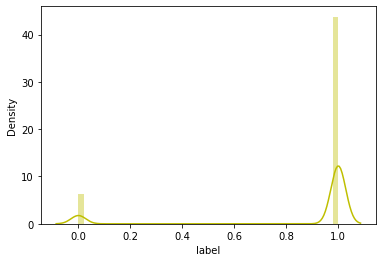

BoxPlot of label
----------------------------------------------------------------------------


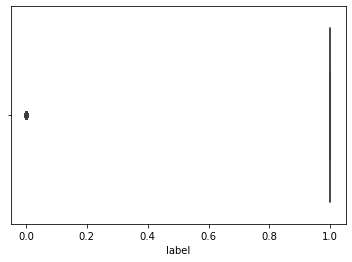

Description of aon
----------------------------------------------------------------------------
count    209593.000000
mean       8112.343445
std       75696.082531
min         -48.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755200
Name: aon, dtype: float64 Distribution of aon
----------------------------------------------------------------------------


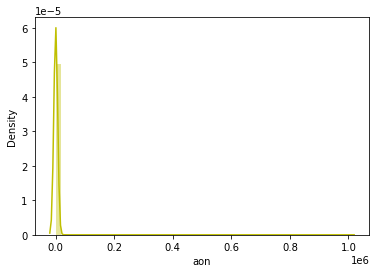

BoxPlot of aon
----------------------------------------------------------------------------


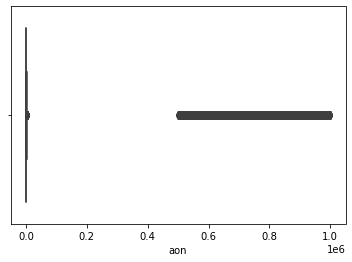

Description of daily_decr30
----------------------------------------------------------------------------
count    209593.000000
mean       5381.402289
std        9220.623400
min         -93.012667
25%          42.440000
50%        1469.175667
75%        7244.000000
max      265926.000000
Name: daily_decr30, dtype: float64 Distribution of daily_decr30
----------------------------------------------------------------------------


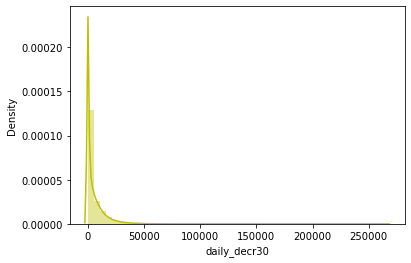

BoxPlot of daily_decr30
----------------------------------------------------------------------------


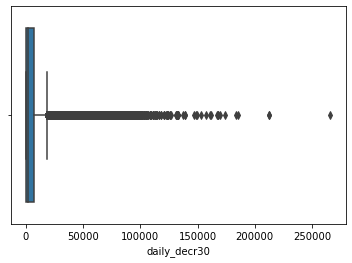

Description of daily_decr90
----------------------------------------------------------------------------
count    209593.000000
mean       6082.515068
std       10918.812767
min         -93.012667
25%          42.692000
50%        1500.000000
75%        7802.790000
max      320630.000000
Name: daily_decr90, dtype: float64 Distribution of daily_decr90
----------------------------------------------------------------------------


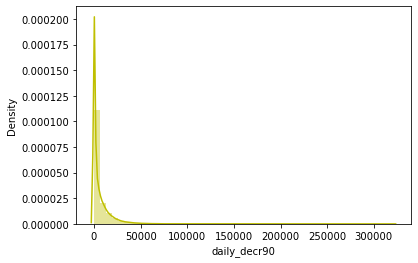

BoxPlot of daily_decr90
----------------------------------------------------------------------------


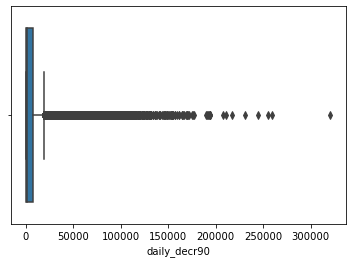

Description of rental30
----------------------------------------------------------------------------
count    209593.000000
mean       2692.581910
std        4308.586781
min      -23737.140000
25%         280.420000
50%        1083.570000
75%        3356.940000
max      198926.110000
Name: rental30, dtype: float64 Distribution of rental30
----------------------------------------------------------------------------


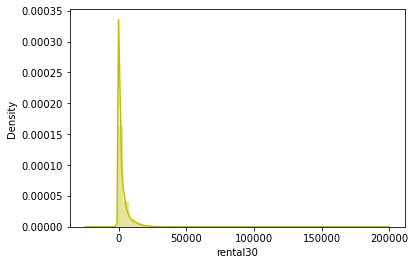

BoxPlot of rental30
----------------------------------------------------------------------------


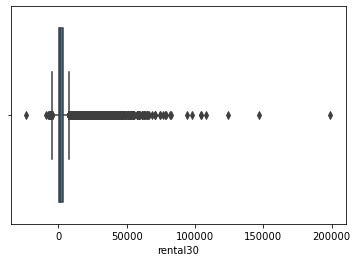

Description of rental90
----------------------------------------------------------------------------
count    209593.000000
mean       3483.406534
std        5770.461279
min      -24720.580000
25%         300.260000
50%        1334.000000
75%        4201.790000
max      200148.110000
Name: rental90, dtype: float64 Distribution of rental90
----------------------------------------------------------------------------


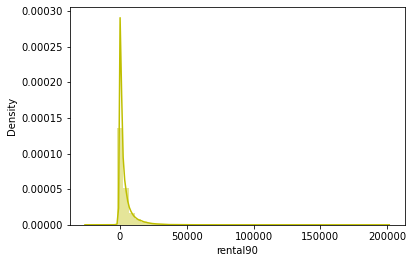

BoxPlot of rental90
----------------------------------------------------------------------------


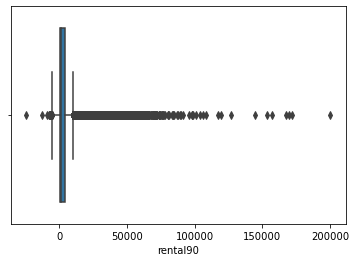

Description of last_rech_date_ma
----------------------------------------------------------------------------
count    209593.00000
mean       3755.84780
std       53905.89223
min         -29.00000
25%           1.00000
50%           3.00000
75%           7.00000
max      998650.37770
Name: last_rech_date_ma, dtype: float64 Distribution of last_rech_date_ma
----------------------------------------------------------------------------


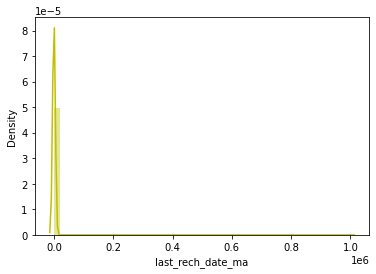

BoxPlot of last_rech_date_ma
----------------------------------------------------------------------------


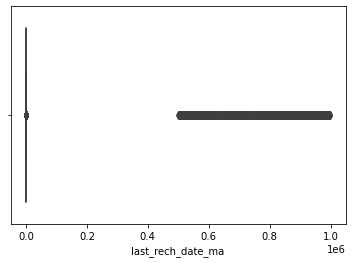

Description of last_rech_date_da
----------------------------------------------------------------------------
count    209593.000000
mean       3712.202921
std       53374.833430
min         -29.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999171.809400
Name: last_rech_date_da, dtype: float64 Distribution of last_rech_date_da
----------------------------------------------------------------------------


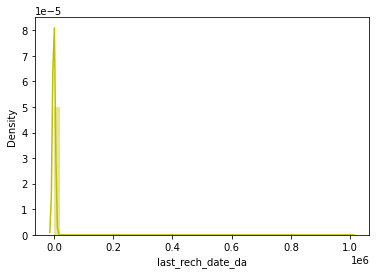

BoxPlot of last_rech_date_da
----------------------------------------------------------------------------


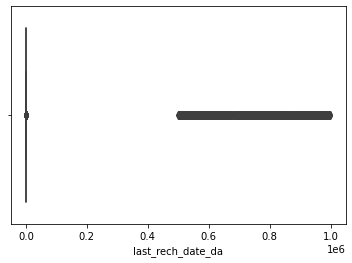

Description of last_rech_amt_ma
----------------------------------------------------------------------------
count    209593.000000
mean       2064.452797
std        2370.786034
min           0.000000
25%         770.000000
50%        1539.000000
75%        2309.000000
max       55000.000000
Name: last_rech_amt_ma, dtype: float64 Distribution of last_rech_amt_ma
----------------------------------------------------------------------------


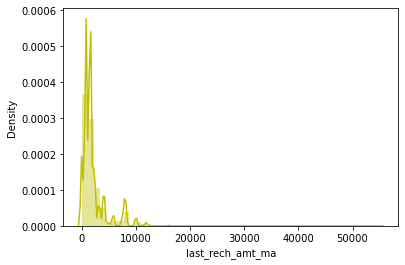

BoxPlot of last_rech_amt_ma
----------------------------------------------------------------------------


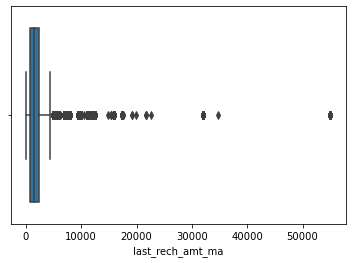

Description of cnt_ma_rech30
----------------------------------------------------------------------------
count    209593.000000
mean          3.978057
std           4.256090
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max         203.000000
Name: cnt_ma_rech30, dtype: float64 Distribution of cnt_ma_rech30
----------------------------------------------------------------------------


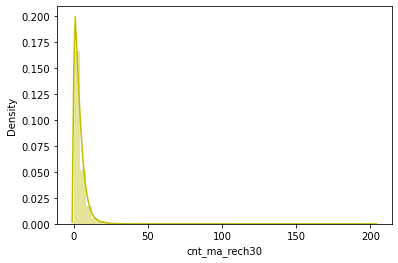

BoxPlot of cnt_ma_rech30
----------------------------------------------------------------------------


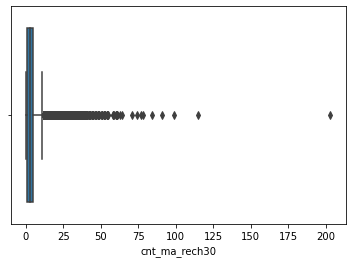

Description of fr_ma_rech30
----------------------------------------------------------------------------
count    209593.000000
mean       3737.355121
std       53643.625172
min           0.000000
25%           0.000000
50%           2.000000
75%           6.000000
max      999606.368100
Name: fr_ma_rech30, dtype: float64 Distribution of fr_ma_rech30
----------------------------------------------------------------------------


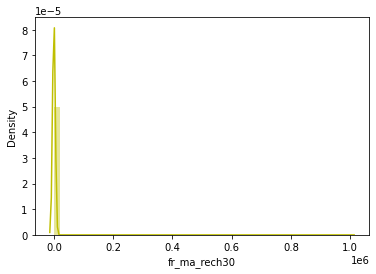

BoxPlot of fr_ma_rech30
----------------------------------------------------------------------------


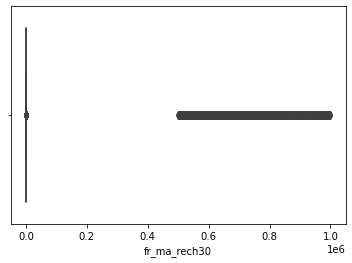

Description of sumamnt_ma_rech30
----------------------------------------------------------------------------
count    209593.000000
mean       7704.501157
std       10139.621714
min           0.000000
25%        1540.000000
50%        4628.000000
75%       10010.000000
max      810096.000000
Name: sumamnt_ma_rech30, dtype: float64 Distribution of sumamnt_ma_rech30
----------------------------------------------------------------------------


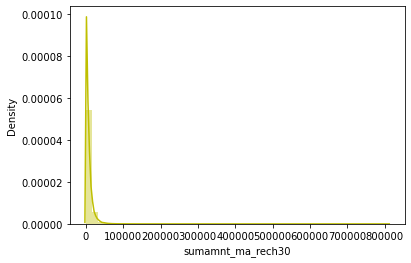

BoxPlot of sumamnt_ma_rech30
----------------------------------------------------------------------------


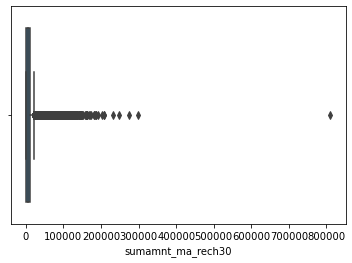

Description of medianamnt_ma_rech30
----------------------------------------------------------------------------
count    209593.000000
mean       1812.817952
std        2070.864620
min           0.000000
25%         770.000000
50%        1539.000000
75%        1924.000000
max       55000.000000
Name: medianamnt_ma_rech30, dtype: float64 Distribution of medianamnt_ma_rech30
----------------------------------------------------------------------------


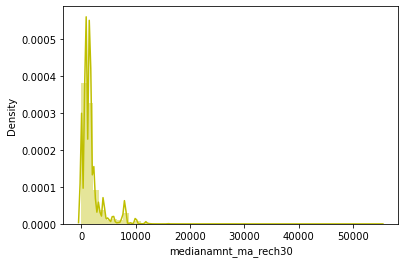

BoxPlot of medianamnt_ma_rech30
----------------------------------------------------------------------------


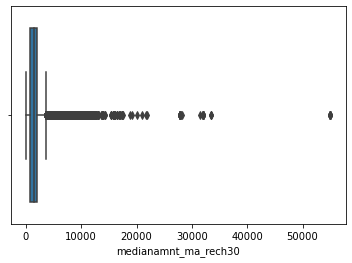

Description of medianmarechprebal30
----------------------------------------------------------------------------
count    209593.000000
mean       3851.927942
std       54006.374433
min        -200.000000
25%          11.000000
50%          33.900000
75%          83.000000
max      999479.419300
Name: medianmarechprebal30, dtype: float64 Distribution of medianmarechprebal30
----------------------------------------------------------------------------


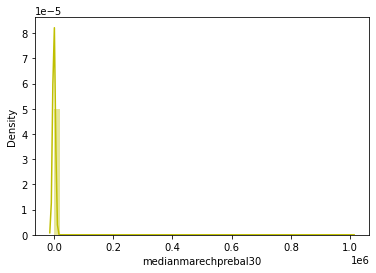

BoxPlot of medianmarechprebal30
----------------------------------------------------------------------------


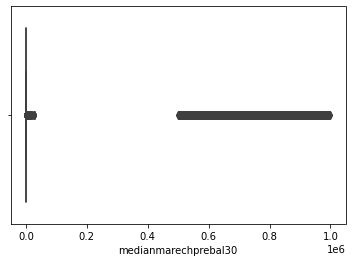

Description of cnt_ma_rech90
----------------------------------------------------------------------------
count    209593.00000
mean          6.31543
std           7.19347
min           0.00000
25%           2.00000
50%           4.00000
75%           8.00000
max         336.00000
Name: cnt_ma_rech90, dtype: float64 Distribution of cnt_ma_rech90
----------------------------------------------------------------------------


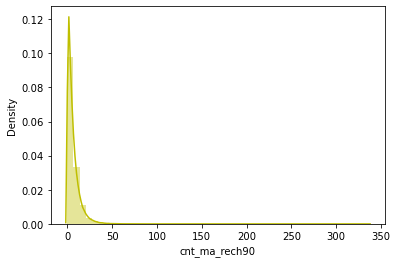

BoxPlot of cnt_ma_rech90
----------------------------------------------------------------------------


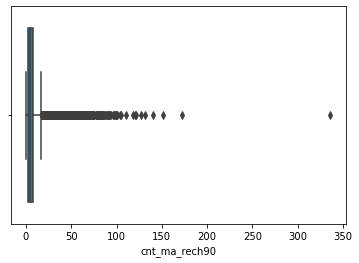

Description of fr_ma_rech90
----------------------------------------------------------------------------
count    209593.000000
mean          7.716780
std          12.590251
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max          88.000000
Name: fr_ma_rech90, dtype: float64 Distribution of fr_ma_rech90
----------------------------------------------------------------------------


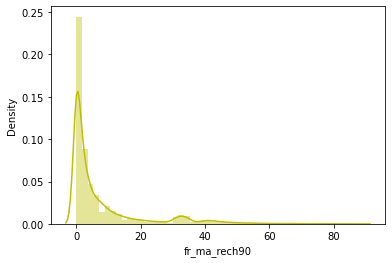

BoxPlot of fr_ma_rech90
----------------------------------------------------------------------------


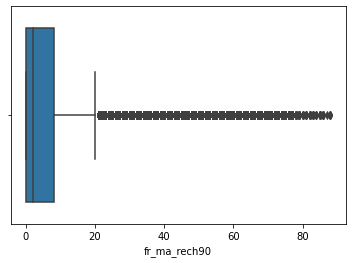

Description of sumamnt_ma_rech90
----------------------------------------------------------------------------
count    209593.000000
mean      12396.218352
std       16857.793882
min           0.000000
25%        2317.000000
50%        7226.000000
75%       16000.000000
max      953036.000000
Name: sumamnt_ma_rech90, dtype: float64 Distribution of sumamnt_ma_rech90
----------------------------------------------------------------------------


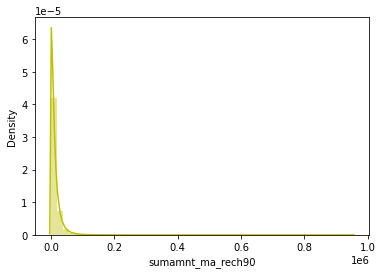

BoxPlot of sumamnt_ma_rech90
----------------------------------------------------------------------------


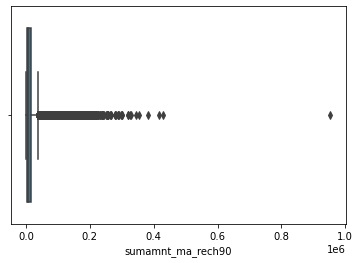

Description of medianamnt_ma_rech90
----------------------------------------------------------------------------
count    209593.000000
mean       1864.595821
std        2081.680664
min           0.000000
25%         773.000000
50%        1539.000000
75%        1924.000000
max       55000.000000
Name: medianamnt_ma_rech90, dtype: float64 Distribution of medianamnt_ma_rech90
----------------------------------------------------------------------------


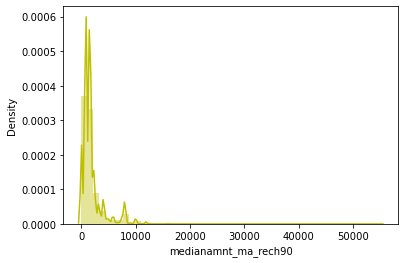

BoxPlot of medianamnt_ma_rech90
----------------------------------------------------------------------------


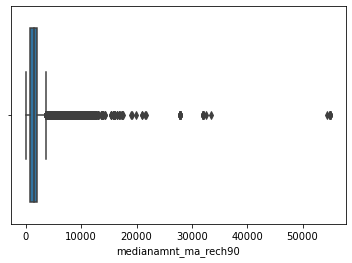

Description of medianmarechprebal90
----------------------------------------------------------------------------
count    209593.000000
mean         92.025541
std         369.215658
min        -200.000000
25%          14.600000
50%          36.000000
75%          79.310000
max       41456.500000
Name: medianmarechprebal90, dtype: float64 Distribution of medianmarechprebal90
----------------------------------------------------------------------------


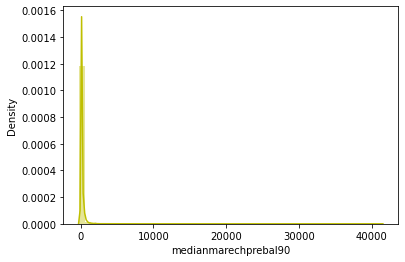

BoxPlot of medianmarechprebal90
----------------------------------------------------------------------------


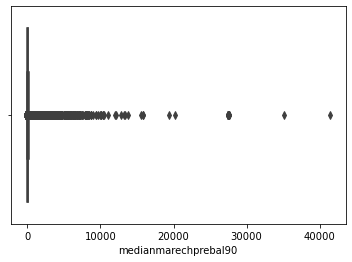

Description of cnt_da_rech30
----------------------------------------------------------------------------
count    209593.000000
mean        262.578110
std        4183.897978
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99914.441420
Name: cnt_da_rech30, dtype: float64 Distribution of cnt_da_rech30
----------------------------------------------------------------------------


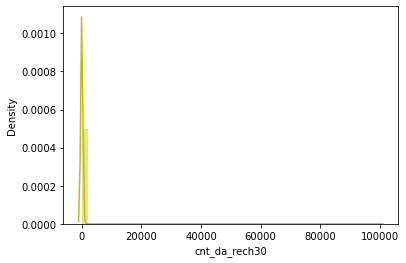

BoxPlot of cnt_da_rech30
----------------------------------------------------------------------------


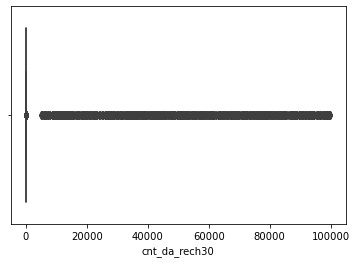

Description of fr_da_rech30
----------------------------------------------------------------------------
count    209593.000000
mean       3749.494447
std       53885.414979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999809.240100
Name: fr_da_rech30, dtype: float64 Distribution of fr_da_rech30
----------------------------------------------------------------------------


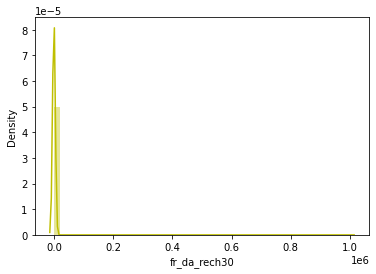

BoxPlot of fr_da_rech30
----------------------------------------------------------------------------


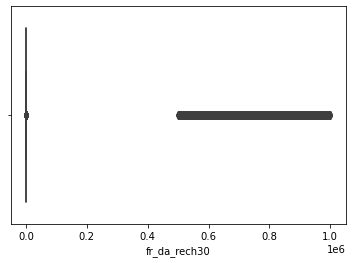

Description of cnt_da_rech90
----------------------------------------------------------------------------
count    209593.000000
mean          0.041495
std           0.397556
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          38.000000
Name: cnt_da_rech90, dtype: float64 Distribution of cnt_da_rech90
----------------------------------------------------------------------------


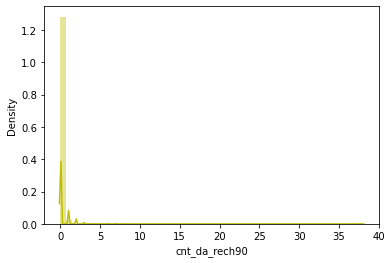

BoxPlot of cnt_da_rech90
----------------------------------------------------------------------------


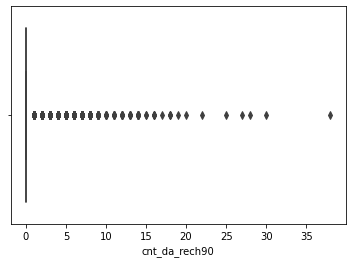

Description of fr_da_rech90
----------------------------------------------------------------------------
count    209593.000000
mean          0.045712
std           0.951386
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          64.000000
Name: fr_da_rech90, dtype: float64 Distribution of fr_da_rech90
----------------------------------------------------------------------------


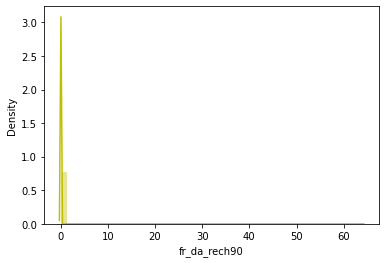

BoxPlot of fr_da_rech90
----------------------------------------------------------------------------


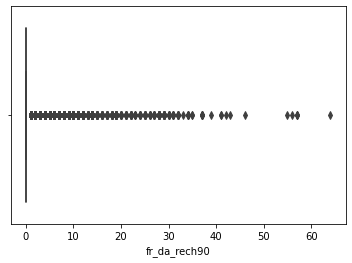

Description of cnt_loans30
----------------------------------------------------------------------------
count    209593.000000
mean          2.758981
std           2.554502
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          50.000000
Name: cnt_loans30, dtype: float64 Distribution of cnt_loans30
----------------------------------------------------------------------------


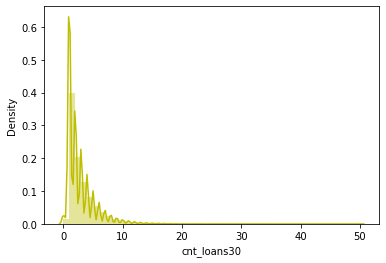

BoxPlot of cnt_loans30
----------------------------------------------------------------------------


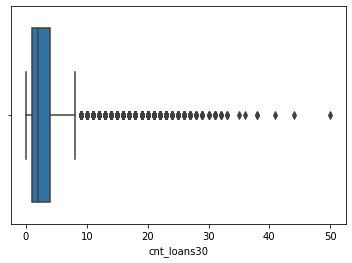

Description of amnt_loans30
----------------------------------------------------------------------------
count    209593.000000
mean         17.952021
std          17.379741
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max         306.000000
Name: amnt_loans30, dtype: float64 Distribution of amnt_loans30
----------------------------------------------------------------------------


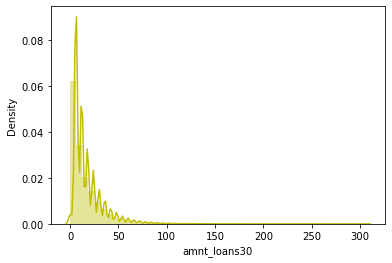

BoxPlot of amnt_loans30
----------------------------------------------------------------------------


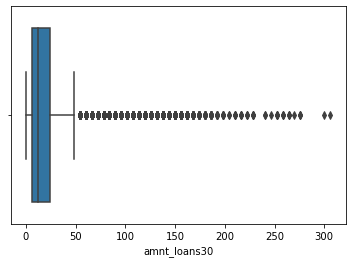

Description of maxamnt_loans30
----------------------------------------------------------------------------
count    209593.000000
mean        274.658747
std        4245.264648
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max       99864.560860
Name: maxamnt_loans30, dtype: float64 Distribution of maxamnt_loans30
----------------------------------------------------------------------------


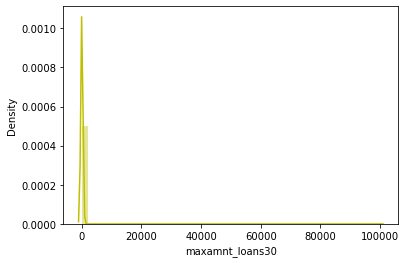

BoxPlot of maxamnt_loans30
----------------------------------------------------------------------------


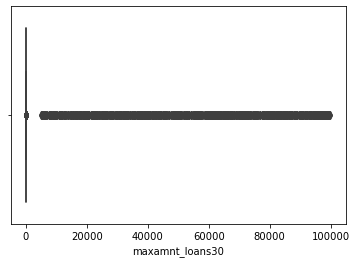

Description of medianamnt_loans30
----------------------------------------------------------------------------
count    209593.000000
mean          0.054029
std           0.218039
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: medianamnt_loans30, dtype: float64 Distribution of medianamnt_loans30
----------------------------------------------------------------------------


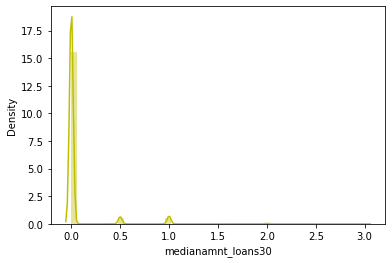

BoxPlot of medianamnt_loans30
----------------------------------------------------------------------------


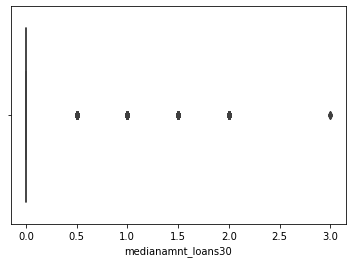

Description of cnt_loans90
----------------------------------------------------------------------------
count    209593.000000
mean         18.520919
std         224.797423
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        4997.517944
Name: cnt_loans90, dtype: float64 Distribution of cnt_loans90
----------------------------------------------------------------------------


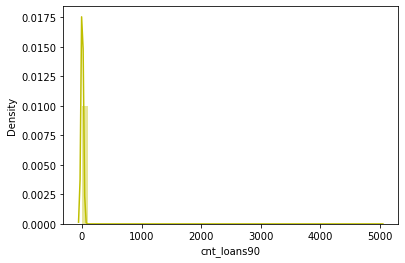

BoxPlot of cnt_loans90
----------------------------------------------------------------------------


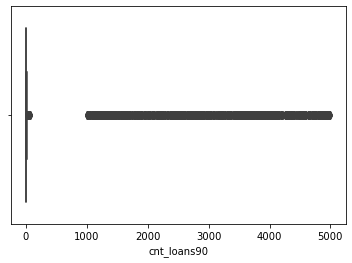

Description of amnt_loans90
----------------------------------------------------------------------------
count    209593.000000
mean         23.645398
std          26.469861
min           0.000000
25%           6.000000
50%          12.000000
75%          30.000000
max         438.000000
Name: amnt_loans90, dtype: float64 Distribution of amnt_loans90
----------------------------------------------------------------------------


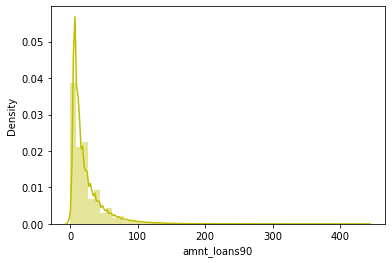

BoxPlot of amnt_loans90
----------------------------------------------------------------------------


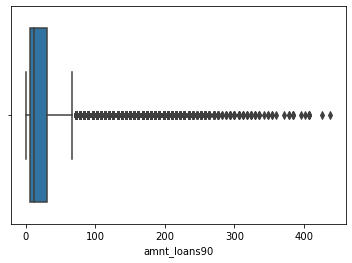

Description of maxamnt_loans90
----------------------------------------------------------------------------
count    209593.000000
mean          6.703134
std           2.103864
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max          12.000000
Name: maxamnt_loans90, dtype: float64 Distribution of maxamnt_loans90
----------------------------------------------------------------------------


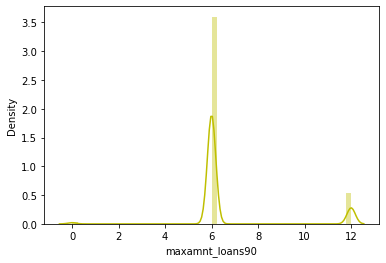

BoxPlot of maxamnt_loans90
----------------------------------------------------------------------------


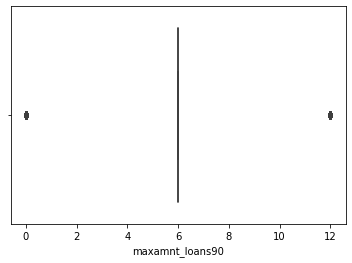

Description of medianamnt_loans90
----------------------------------------------------------------------------
count    209593.000000
mean          0.046077
std           0.200692
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: medianamnt_loans90, dtype: float64 Distribution of medianamnt_loans90
----------------------------------------------------------------------------


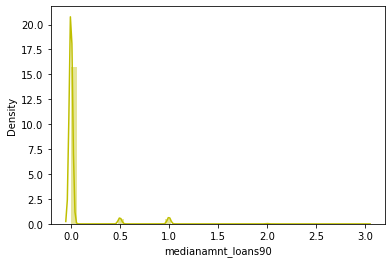

BoxPlot of medianamnt_loans90
----------------------------------------------------------------------------


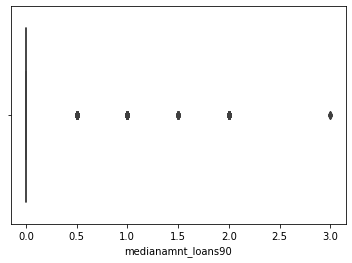

Description of payback30
----------------------------------------------------------------------------
count    209593.000000
mean          3.398826
std           8.813729
min           0.000000
25%           0.000000
50%           0.000000
75%           3.750000
max         171.500000
Name: payback30, dtype: float64 Distribution of payback30
----------------------------------------------------------------------------


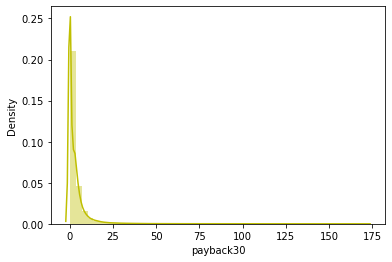

BoxPlot of payback30
----------------------------------------------------------------------------


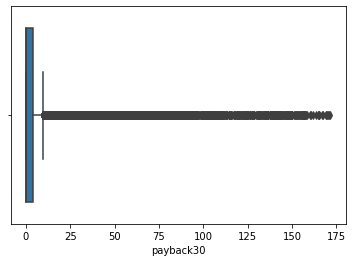

Description of payback90
----------------------------------------------------------------------------
count    209593.000000
mean          4.321485
std          10.308108
min           0.000000
25%           0.000000
50%           1.666667
75%           4.500000
max         171.500000
Name: payback90, dtype: float64 Distribution of payback90
----------------------------------------------------------------------------


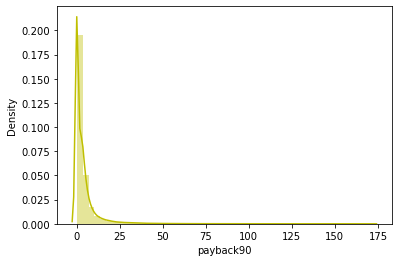

BoxPlot of payback90
----------------------------------------------------------------------------


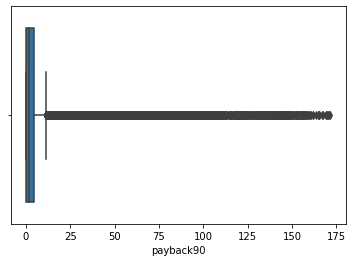

In [12]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

-Min age on cellular netowrk is -48, outlier seen in this column 999860 .
-Daily_descr30 (The amount spend from main account, averaged over last 30 days(in indonetian rupeh)):-Min amount spend -93 Rupiah, 25%: 42 , 50%: 1469 , 75%: 7244, Max : 265926 Rupiah.Outliers are seen in this dataset.
-Daily_descr90(Average amount spend over 90 days  from main account) min spend -90 , 25%: 42, 50%: 1500, 75%: 8702, Max: 320630. Outliers are seen in this column.
-Rental 30 (Average main account balance over last 30 days):-min balance is -23737 which may be  outliers. 25% : 280, 50%: 1083, 75%: 3356, max: 198926. Outliers are seen in both the direction.
-Rental 90 (Average main account balance over last 90 days:- min -24720 balance, 25%: 300, 50%: 1334, 75%: 4201, max: 200148. outliers are observed in this column.
-Last_rech_date_ma (Number of days till last recharge of main account):- last recharge min days -29 , max: 998650.
-Last_rech_date_dat(Number of days till recharge data account) :- min days :-29, max : 999171 days.
-Last_rech_amt_ma (Last recharge amount on main account): min 0 amount, 25%: 770 Rupiah, 50%: 1539, 75%: 2309, Max amount: 55000. Mean amount : - 2064 Rupiah. Outlier are seen in this account.
-Number of times main account got recharged over ast 30 dyas:- Min 0 times, 25%: 1 times, 50%: 3 times, 75%: 5 times, Max: 203 times account recharged over 30 days. Outlier are senn in this account. DataSet is positively skewed.
-Frequescy of main account got recharged in last 30 days:- Min 0 times, 25%: 0 times, 50%: 2 times, 75%: 6 times, ax: 999606 imes account has been recharged. As like above data is positively skewd & 
-Total amount of recharge in main account over last 30 days : - Min 0 amount spend, 25%: 2540 ,50%: 4628,75%: 10010, Max: 810096. Outlier are seen in this column.
-Median of amount of recharges done in main account over last 30 days at userlevel: Min 0 , 25%: 770, 50%: 1539, 75%: 1924, max: 55000.


In [10]:
#Checking the outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr = q3 - q1
((df<(q1 -(1.5 * iqr)))|(df>(q3 +(1.5 * iqr)))).sum()

amnt_loans30            10416
amnt_loans90            12590
aon                      3607
cnt_da_rech30            4114
cnt_da_rech90            5367
cnt_loans30              7817
cnt_loans90             11523
cnt_ma_rech30           11294
cnt_ma_rech90           14155
daily_decr30            16350
daily_decr90            18187
fr_da_rech30             1579
fr_da_rech90              865
fr_ma_rech30            11450
fr_ma_rech90            26845
label                   26162
last_rech_amt_ma        20864
last_rech_date_da        6732
last_rech_date_ma       20145
maxamnt_loans30         30400
maxamnt_loans90         28648
medianamnt_loans30      14148
medianamnt_loans90      12169
medianamnt_ma_rech30    24928
medianamnt_ma_rech90    25457
medianmarechprebal30    27252
medianmarechprebal90    25933
msisdn                      0
payback30               16532
payback90               17850
pcircle                     0
pdate                       0
rental30                18526
rental90  

<AxesSubplot:xlabel='label', ylabel='count'>

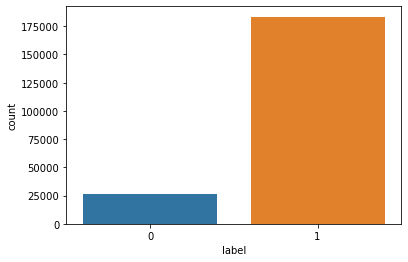

In [11]:
#Visualiasing the label
sns.countplot(df["label"])

#Label :0 means user failed to paid back, 1 means user successfully paid back. Above data is imbalance hence we are going to balance the dataset in order to predict correct output.

In [12]:
#Separating features & label to visualise Feature Vs label for detail analysis
x=df.drop(["label"],axis=1)
y=df["label"]


In [20]:
x.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [ ]:


plt.figure(figsize=(20,7))
sns.countplot(df["rental90"], hue=df["label"])

In [ ]:


plt.figure(figsize=(20,7))
sns.countplot(df["cnt_ma_rech30"], hue=df["label"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]),
 [Text(0, 0, '0'),
  Text(1, 0, '173'),
  Text(2, 0, '177'),
  Text(3, 0, '769'),
  Text(4, 0, '770'),
  Text(5, 0, '772'),
  Text(6, 0, '773'),
  Text(7, 0, '777'),
  Text(8, 0, '790'),
  Text(9, 0, '946'),
  Text(10, 0, '947'),
  Text(11, 0, '954'),
  Text(12, 0, '1333'),
  Text(13, 0, '1538'),
  Text(14, 0, '1539'),
  Text(15, 0, '1546'),
  Text(16, 0, '1547'),
  Text(17, 0, '1554'),
  Text(18, 0, '1580'),
  Text(19, 0, '1720'),
  Text(20, 0, '1923'),
  Text(21, 0, '1924'),
  Text(22, 0, '1933'),
  Text(23, 0, '2309'),
  Text(24, 0, '2320'),
  Text(25, 0, '2593'),
  Text(26, 0, '3178'),
  Text(27, 0, '3193'),
  Text(28, 0, '3466'),
  Text(29, 0, '3467'),
  Text(30, 0

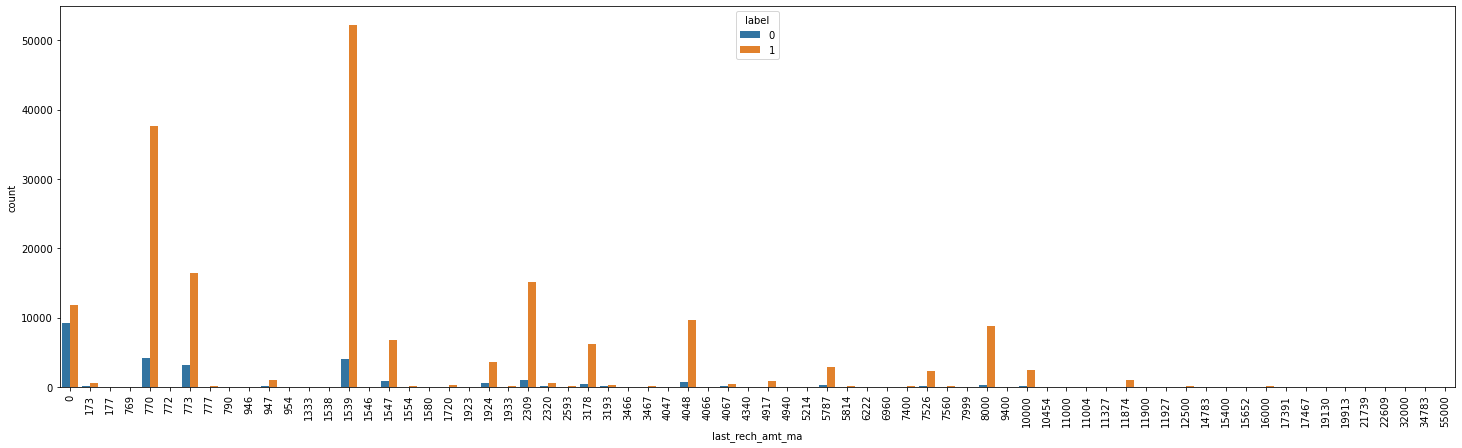

In [76]:
#Amount of last recharge of main account (in Indonesian Rupiah)


plt.figure(figsize=(25,7))
sns.countplot(df["last_rech_amt_ma"], hue=df["label"])
plt.xticks(rotation=(90))

In [ ]:
#The peoples whoes last recharge main account is zero are are higher in nos. who are defaulter, follwed by some peoples whoes main account is 770, 773, 1539 are not paying baack loan & these are defaulters.

<AxesSubplot:xlabel='cnt_ma_rech90', ylabel='count'>

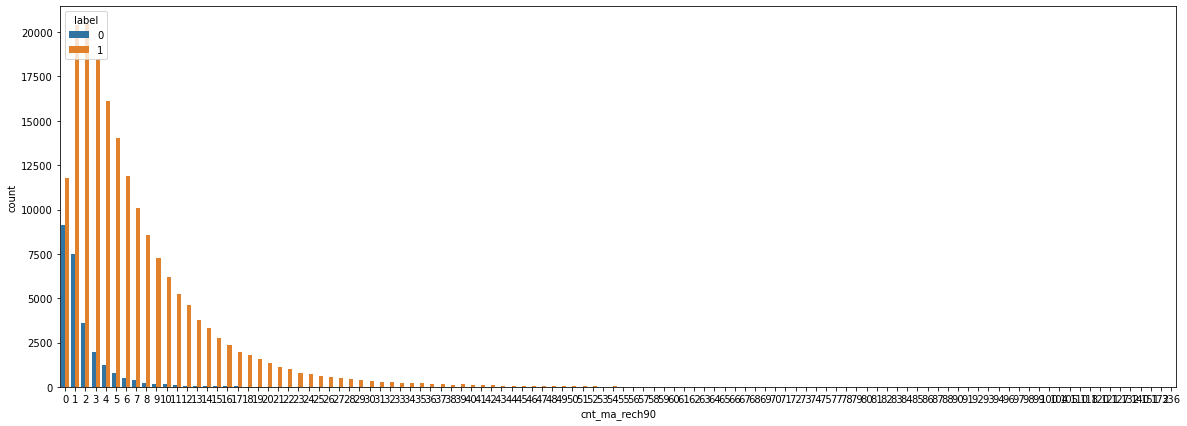

In [68]:
#Number of times main account got recharged in last 90 days

plt.figure(figsize=(20,7))
sns.countplot(df["cnt_ma_rech90"], hue=df["label"])

In [ ]:
#The peoples who are recharging the main account less than 5 times some of them are the defaulters.

<AxesSubplot:xlabel='fr_ma_rech90', ylabel='count'>

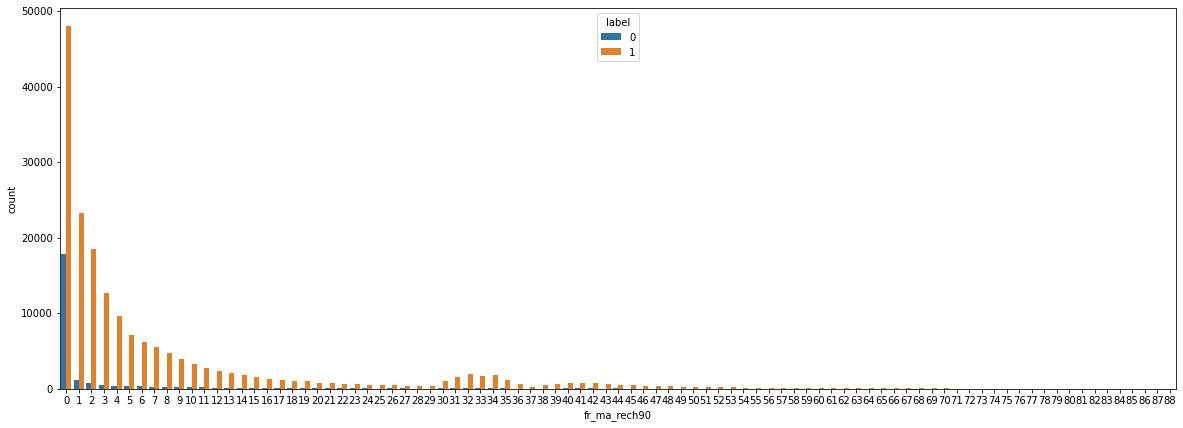

In [67]:
#Frequency of main account recharged in last 90 days

plt.figure(figsize=(20,7))
sns.countplot(df["fr_ma_rech90"], hue=df["label"])

In [ ]:
#The peoples whoes recharging frequency is zero most of peoples are observed as a defaulters.

<AxesSubplot:xlabel='label', ylabel='fr_da_rech30'>

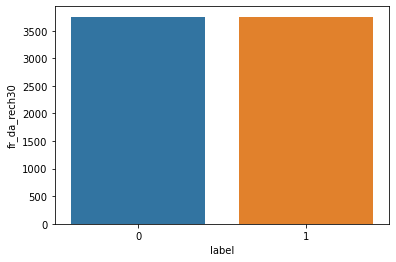

In [53]:
#Frequency of data account recharged in last 30 days Vs Label

sns.barplot(y=df["fr_da_rech30"], x=df["label"], ci=None)

<AxesSubplot:xlabel='fr_da_rech90', ylabel='count'>

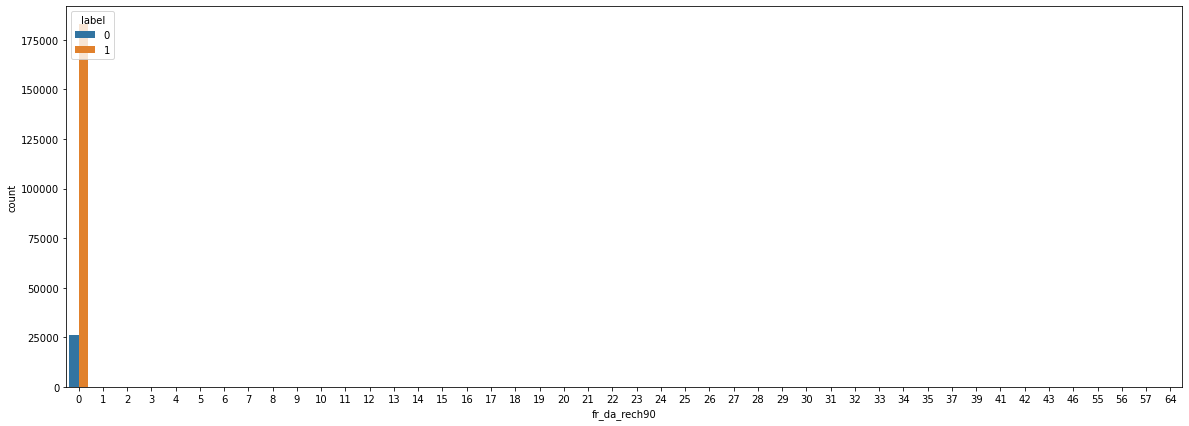

In [47]:
#Frequency of data account recharged in last 90 days Vs Label
plt.figure(figsize=(20,7))
sns.countplot(df["fr_da_rech90"], hue=df["label"])

In [ ]:
#Data account recharged frequescy is zero times & some of peoples around 25K are the defaulters.

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans30'>

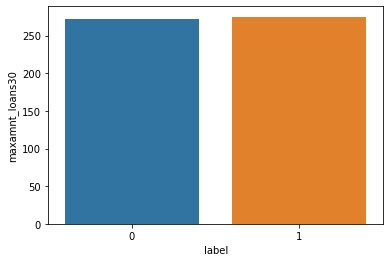

In [40]:
#maximum amount of loan taken by the user in last 30 days Vs Label
sns.barplot(y=df['maxamnt_loans30'], x=df['label'], ci=None)

<AxesSubplot:xlabel='medianamnt_loans30', ylabel='count'>

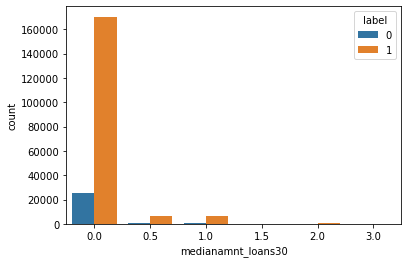

In [41]:
sns.countplot(df['medianamnt_loans30'],hue=df["label"])

<AxesSubplot:xlabel='label', ylabel='cnt_loans30'>

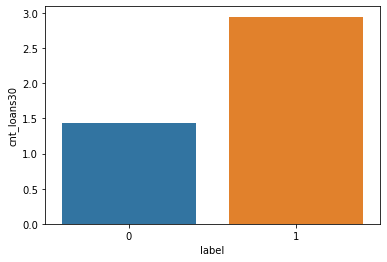

In [45]:
#Number of loans taken by user in last 30 days Vs Label

sns.barplot(y=df["cnt_loans30"], x=df["label"], ci=None)

1.000000       73862
2.000000       37286
3.000000       23986
4.000000       16761
5.000000       12331
               ...  
3940.313295        1
2547.650840        1
2925.920310        1
1757.322504        1
2047.902454        1
Name: cnt_loans90, Length: 1110, dtype: int64

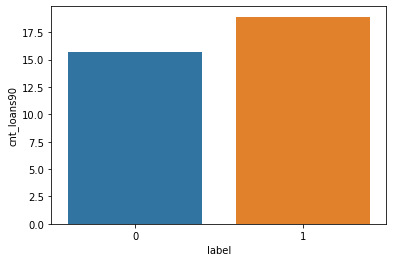

In [42]:
#Number of loans taken by user in last 90 days Vs Label

sns.barplot(y=df["cnt_loans90"], x=df["label"], ci=None)
df["cnt_loans90"].value_counts()

<AxesSubplot:xlabel='amnt_loans30', ylabel='count'>

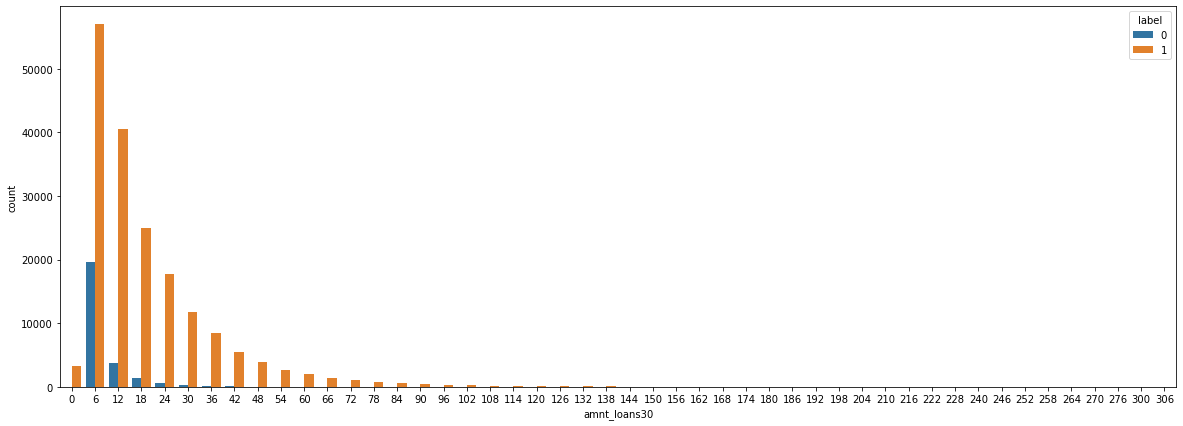

In [44]:

plt.figure(figsize=(20,7))
sns.countplot(df["amnt_loans30"], hue=df["label"])

In [ ]:
#The peoples who are taking loan amount 6 they are mainly defaulters followed by very less peoples who are defaulters who took the loan amount 12, 18.

<AxesSubplot:xlabel='amnt_loans90', ylabel='count'>

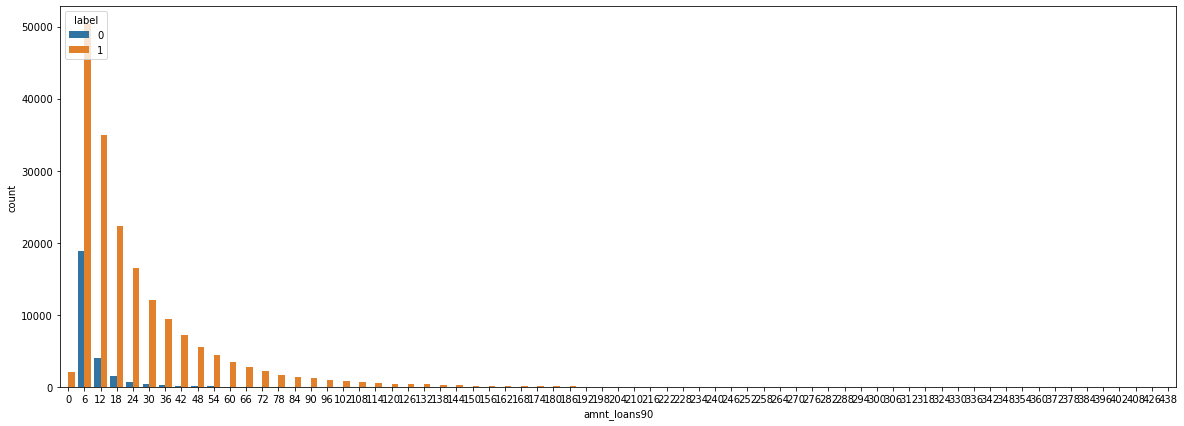

In [23]:
#Total amount of loans taken by user in last 90 days Vs Label

plt.figure(figsize=(20,7))
sns.countplot(df["amnt_loans90"], hue=df["label"])
#plt.xticks(rotation=(90))

In [42]:
#Peoples are not paying back loan amount 6 mostly. 

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='count'>

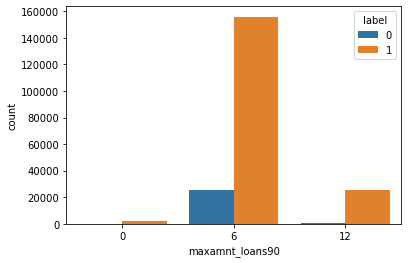

In [19]:
sns.countplot(df["maxamnt_loans90"], hue=df["label"])

In [43]:
#Mainly maximum amount loan 6 are the defaulters. 

<AxesSubplot:xlabel='medianamnt_loans90', ylabel='count'>

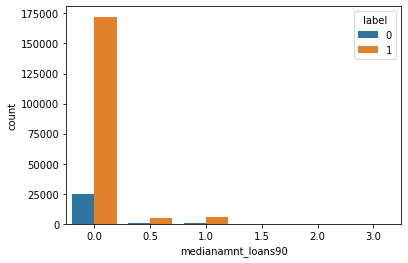

In [17]:
sns.countplot(df["medianamnt_loans90"], hue=df["label"])

In [ ]:
#

<Figure size 1440x504 with 0 Axes>

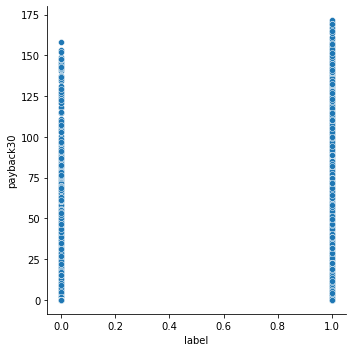

In [15]:
plt.figure(figsize=(20,7))
sns.relplot(y=df["payback30"], x=df["label"])

<Figure size 1440x504 with 0 Axes>

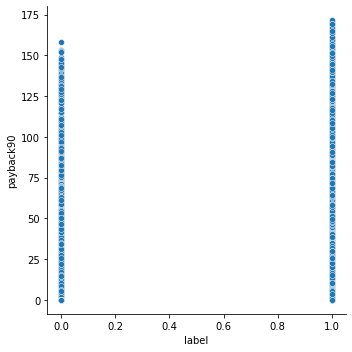

In [14]:
plt.figure(figsize=(20,7))
sns.relplot(y=df["payback90"], x=df["label"])

<AxesSubplot:ylabel='label'>

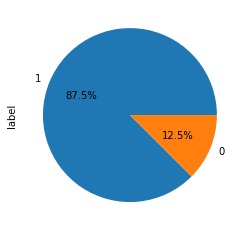

In [10]:
df["label"].value_counts().plot.pie(autopct='%1.1f%%')


In [ ]:
#From above it is observed that 12.5% peoples are defaulters where as 87.5% peoples are paid within time.

No. of PCircle UPW    209593
Name: pcircle, dtype: int64


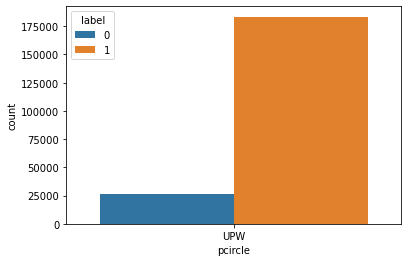

In [16]:
sns.countplot(df["pcircle"],hue=df["label"])
print("No. of PCircle", df["pcircle"].value_counts())

In [17]:
#There is only one pcircle.

In [11]:
print("", df["pdate"].value_counts())


No. of PDate 04-07-2016    3150
05-07-2016    3127
07-07-2016    3116
20-06-2016    3099
17-06-2016    3082
              ... 
04-06-2016    1559
18-08-2016    1407
19-08-2016    1132
20-08-2016     788
21-08-2016     324
Name: pdate, Length: 82, dtype: int64


In [10]:
cols=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']

Removing outliers from features

In [11]:
def remove_outlier(cols):
    sorted(cols)
    Q1,Q3=np.percentile(cols,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [12]:
for column in cols:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

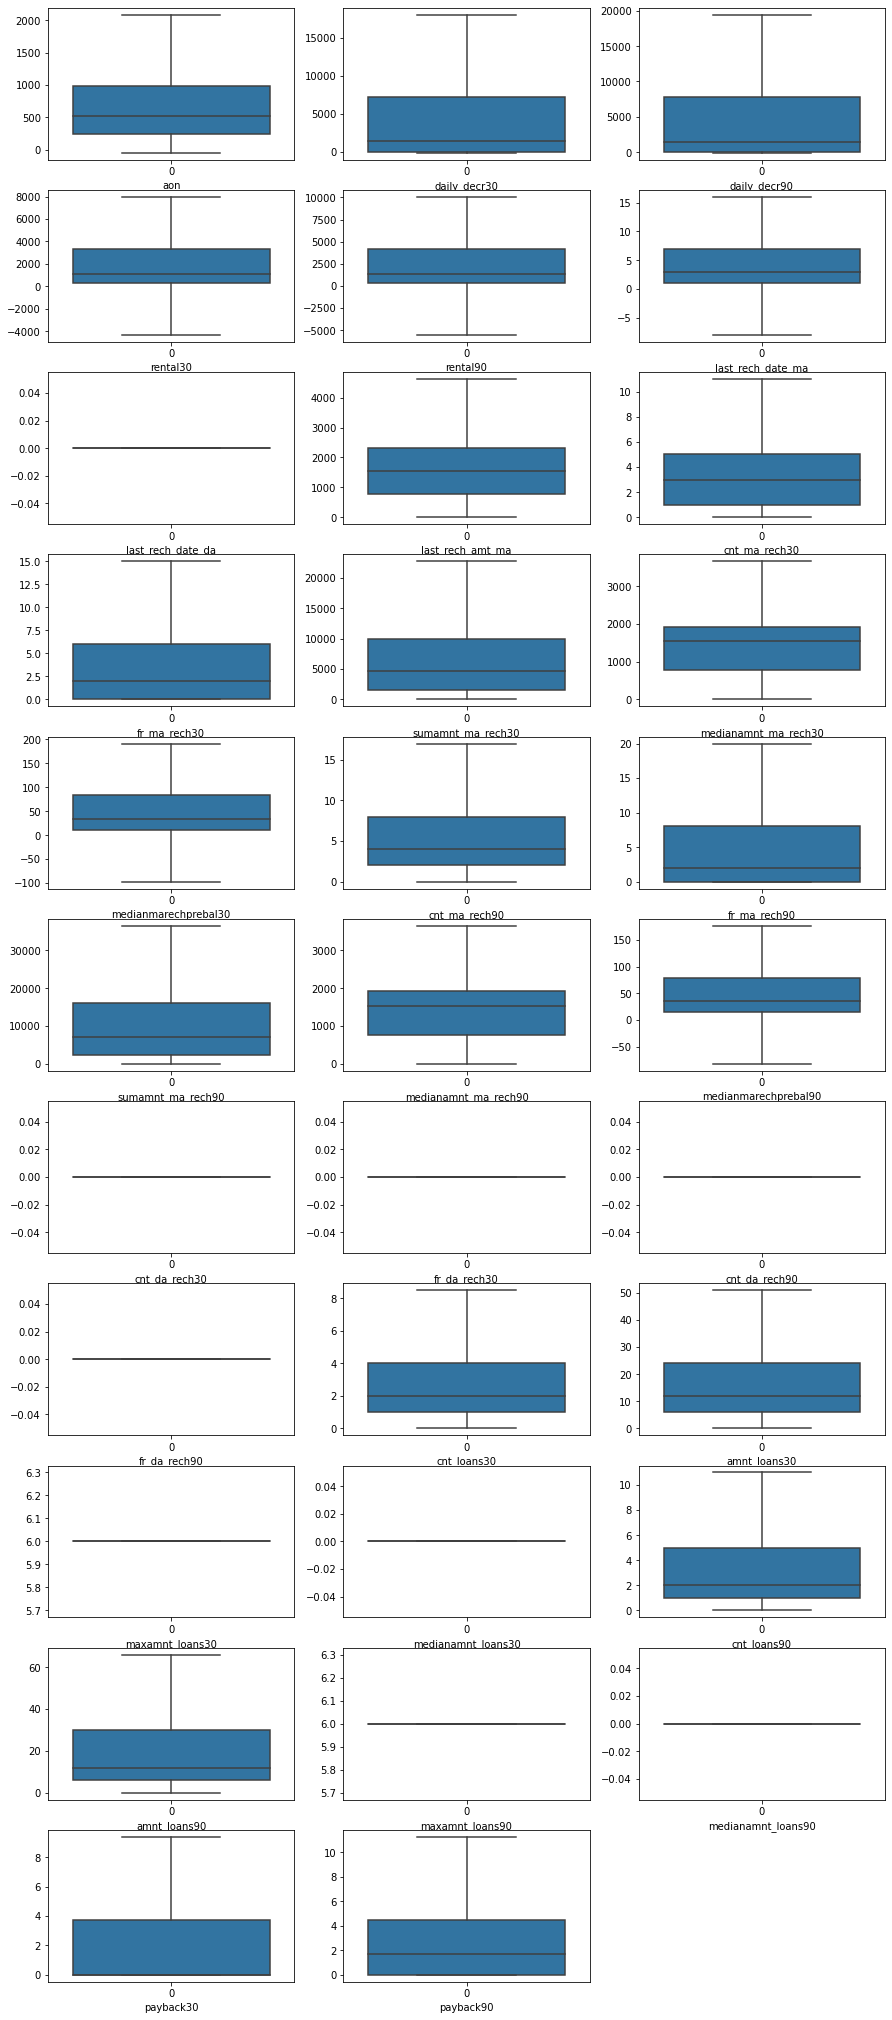

In [13]:
plt.figure(figsize=(15,100))
graph=1

for column in cols:
    
    if graph<=36:
        
        plt.subplot(30,3, graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=10)
    

    graph+=1

plt.show()

In [14]:
#now Seperating the date columns
df['pdate'] = pd.to_datetime(df['pdate'])
df['year'] = df['pdate'].dt.year
df['month'] = df['pdate'].dt.month
df['day'] = df['pdate'].dt.day

In [15]:
df.drop("pdate",axis=1, inplace=True)

In [16]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,year,month,day
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539.0,...,2.0,12.0,6.0,0.0,9.375000,11.250000,UPW,2016,7,20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,16.0,0.0,4617.5,...,1.0,12.0,6.0,0.0,0.000000,0.000000,UPW,2016,10,8
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539.0,...,1.0,6.0,6.0,0.0,0.000000,0.000000,UPW,2016,8,19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,16.0,0.0,947.0,...,2.0,12.0,6.0,0.0,0.000000,0.000000,UPW,2016,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309.0,...,7.0,42.0,6.0,0.0,2.333333,2.333333,UPW,2016,6,22


In [17]:
df.shape

(209593, 38)

# Encoding the Categorical columns into numericals

In [18]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()

In [19]:
cat_data=["msisdn","pcircle"]

df[cat_data]=df[cat_data].apply(LabelEncoder().fit_transform)

df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,year,month,day
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539.0,...,2.0,12.0,6.0,0.0,9.375000,11.250000,0,2016,7,20
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,16.0,0.0,4617.5,...,1.0,12.0,6.0,0.0,0.000000,0.000000,0,2016,10,8
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539.0,...,1.0,6.0,6.0,0.0,0.000000,0.000000,0,2016,8,19
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,16.0,0.0,947.0,...,2.0,12.0,6.0,0.0,0.000000,0.000000,0,2016,6,6
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309.0,...,7.0,42.0,6.0,0.0,2.333333,2.333333,0,2016,6,22


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  int32  
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  float64
 10  cnt_ma_rech30         209593 non-null  float64
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

<AxesSubplot:>

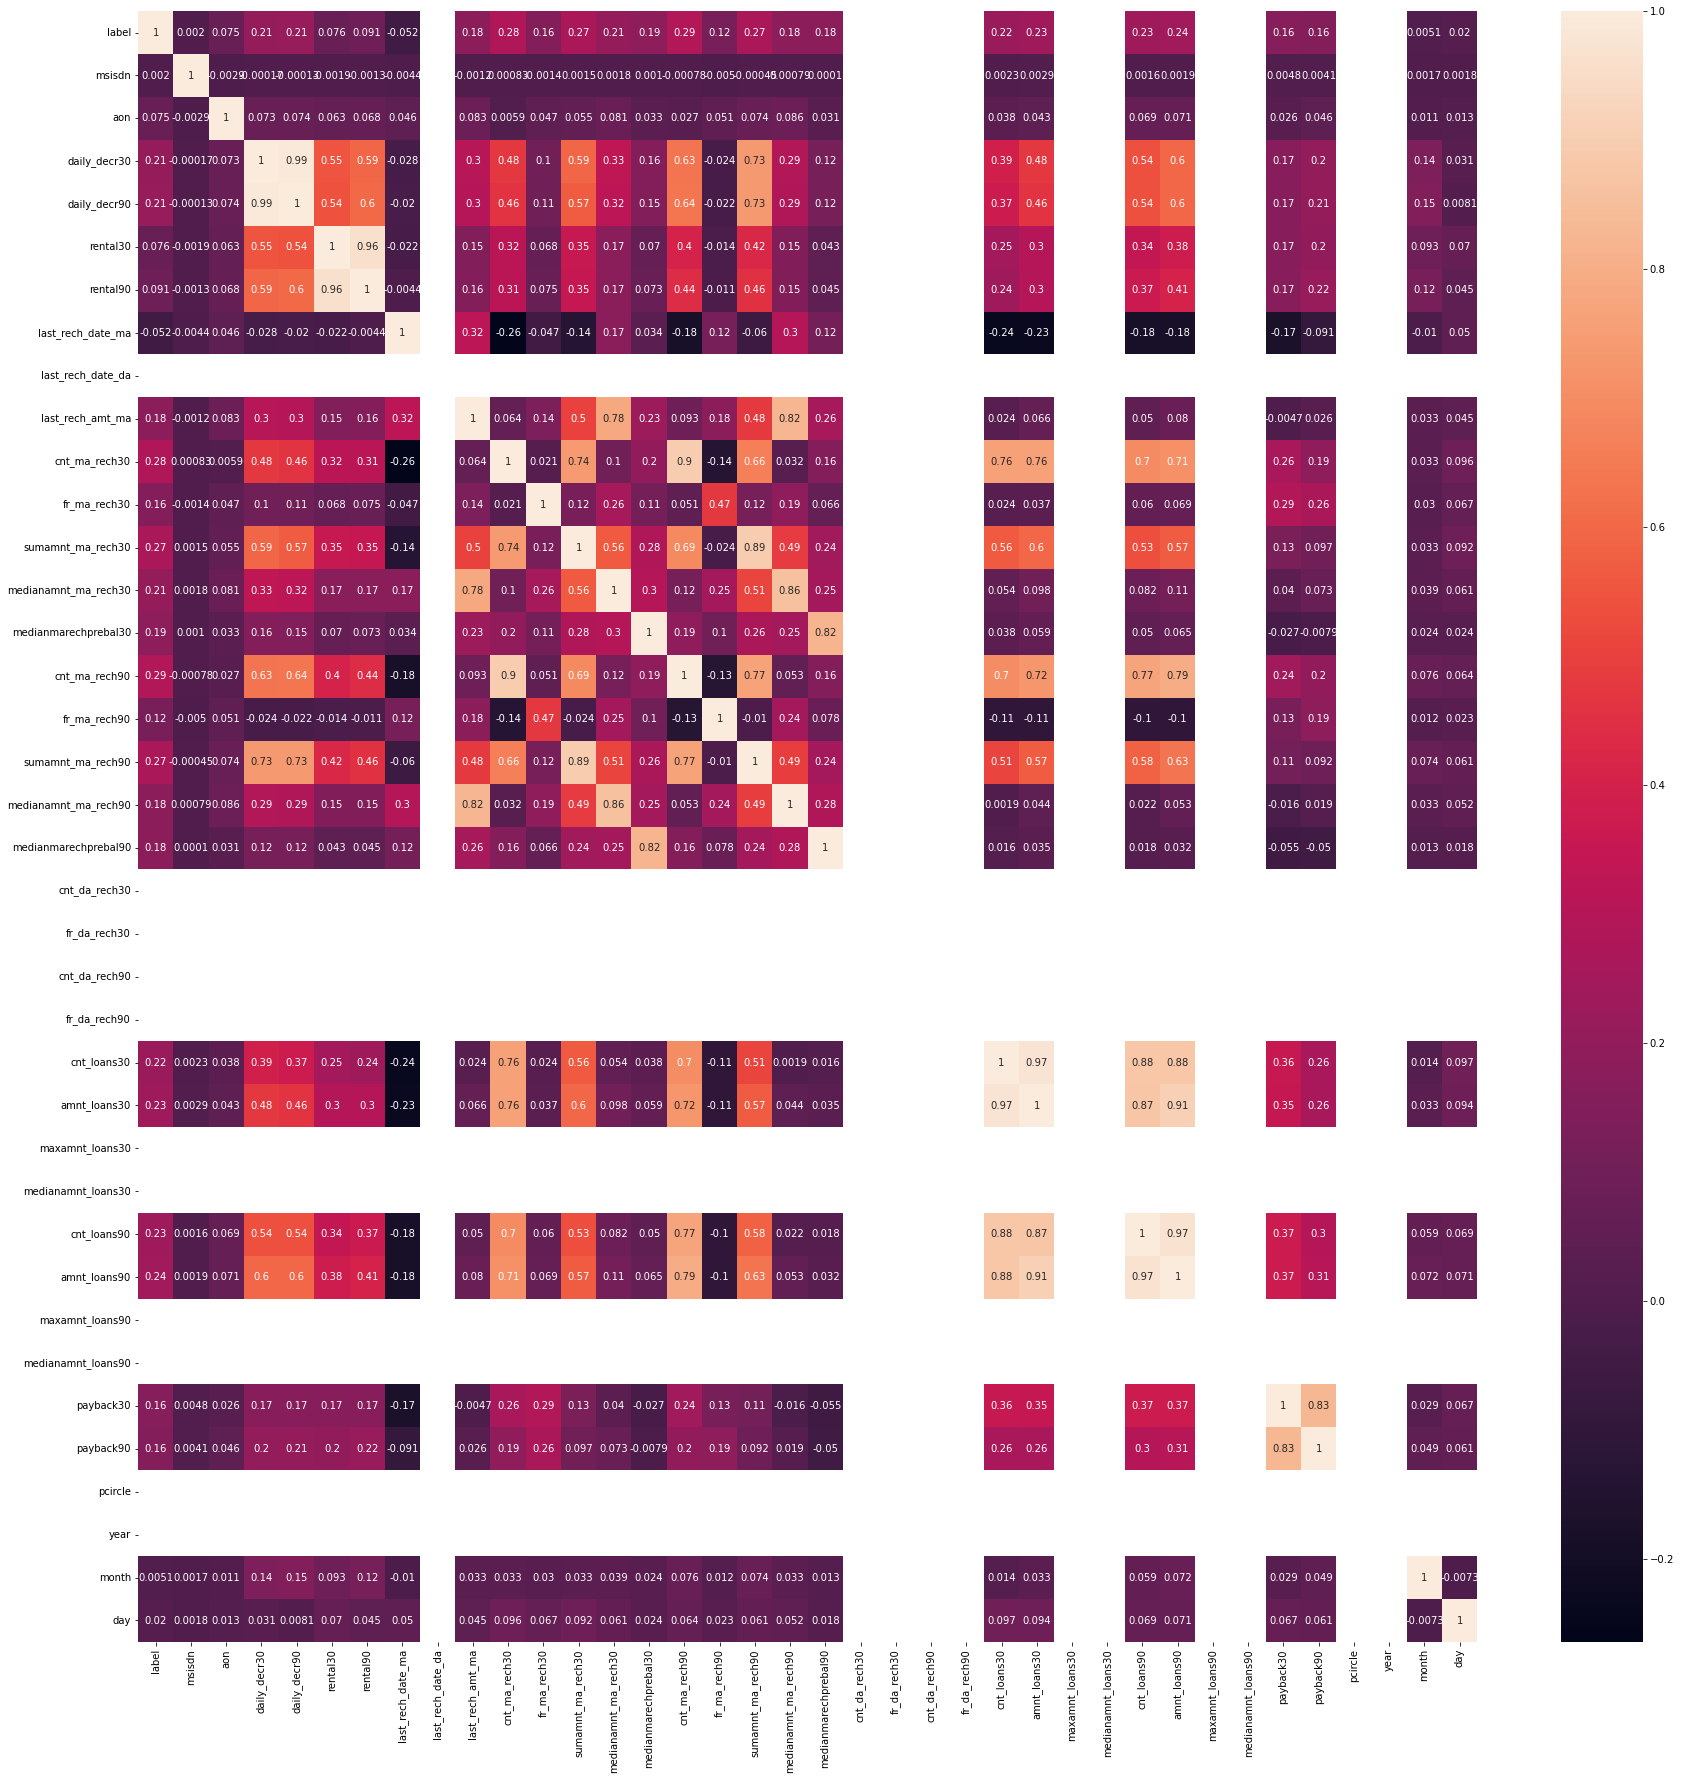

In [22]:

#Finding the correlationship between dataset using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)

# Scaling using Standard scalar

In [21]:
#Seperating the features & label

x=df.drop('label',axis=1)
y=df["label"]

In [22]:
#Scaling of dataset
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [28]:
#Finding Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

vif


,vif,features
0,1.000162,msisdn
1,1.022506,aon
2,54.548375,daily_decr30
3,59.200080,daily_decr90
4,15.498293,rental30
5,17.216887,rental90
6,1.419118,last_rech_date_ma
7,NaN,last_rech_date_da
8,3.720278,last_rech_amt_ma
9,15.461816,cnt_ma_rech30


# Train Test Split

In [23]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=1)

In [24]:
# Write a function & call to check accuracy score of different model

def metric_score (clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n =============Train Result===============")
        print(f"Accuracy score:{accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print("\n =============Test Result================")
        print(f"Accuracy score:{accuracy_score(y_test, pred)*100:.2f}%")
        
        print("\n \n classification report \n", classification_report(y_test, pred, digits=2))
        

# Model Initialisatiion using Decision Tree classifier

In [26]:
#Model initialization
# Trying for Decision tree Classifier

clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [27]:
# Call the function & pass the data set into it.

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # This is for trainig score
metric_score(clf, x_train, x_test, y_train, y_test, train=False)  #This is for testing score


 =============Train Result===============
Accuracy score:100.00%

 =============Test Result================
Accuracy score:88.22%

 
 classification report 
               precision    recall  f1-score   support

           0       0.53      0.54      0.53      6529
           1       0.93      0.93      0.93     45870

    accuracy                           0.88     52399
   macro avg       0.73      0.74      0.73     52399
weighted avg       0.88      0.88      0.88     52399



# Since our data set is imbalance hence we are going to balance the dataset using oversampling techniques

In [25]:
class_count_0, class_count_1=df['label'].value_counts()

#devide by class

class_0=df[df["label"]==0]
class_1=df[df["label"]==1]


In [26]:
class_0_over=class_0.sample(class_count_0,replace=True)

test_over=pd.concat([class_0_over,class_1],axis=0)

print(test_over['label'].value_counts())

0    183431
1    183431
Name: label, dtype: int64


In [27]:
test_over.label.value_counts()

0    183431
1    183431
Name: label, dtype: int64

In [28]:
df=pd.concat([test_over])

In [29]:
df.shape

(366862, 38)

In [30]:
df["label"].value_counts()

0    183431
1    183431
Name: label, dtype: int64

In [31]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,year,month,day
72586,0,82320,139.0,3.000,3.00,12.00,12.000,0.0,0.0,0.0,...,1.0,6.0,6.0,0.0,0.000000,0.00,0,2016,12,6
132841,0,51046,353.0,2420.000,2420.00,2148.13,3122.130,3.0,0.0,1539.0,...,1.0,6.0,6.0,0.0,0.000000,0.00,0,2016,10,7
97419,0,141795,1356.0,0.150,0.15,1208.70,1208.700,0.0,0.0,0.0,...,1.0,6.0,6.0,0.0,0.000000,0.00,0,2016,5,6
145995,0,103137,150.0,4618.912,4647.28,7971.72,9532.710,3.0,0.0,1539.0,...,5.0,30.0,6.0,0.0,7.000000,7.00,0,2016,7,18
107922,0,185719,179.0,5887.025,5904.05,7971.72,10054.085,3.0,0.0,2309.0,...,4.0,24.0,6.0,0.0,8.333333,11.25,0,2016,7,15


In [32]:
df.shape

(366862, 38)

In [33]:
x=df.drop("label",axis=1)
y=df["label"]

In [34]:
y.shape

(366862,)

In [35]:
#Scaling of dataset
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [36]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=1)

# Decision Tree Classifier

In [39]:
#Model initialization

clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
# Write a function & call to check accuracy score of different model

def metric_score (clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n =============Train Result===============")
        print(f"Accuracy score:{accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print("\n =============Test Result================")
        print(f"Accuracy score:{accuracy_score(y_test, pred)*100:.2f}%")
        
        print("\n \n classification report \n", classification_report(y_test, pred, digits=2))
        

In [41]:
# Again Call the function after oversampling & pass the data set into it.

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # This is for trainig score
metric_score(clf, x_train, x_test, y_train, y_test, train=False)  #This is for testing score


 =============Train Result===============
Accuracy score:100.00%

 =============Test Result================
Accuracy score:95.94%

 
 classification report 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     45924
           1       1.00      0.92      0.96     45792

    accuracy                           0.96     91716
   macro avg       0.96      0.96      0.96     91716
weighted avg       0.96      0.96      0.96     91716



#As we have balanced the dataset hence we got the accuracy score: 95.94% which is very good score, F1 score: 96%, recall: 96%, precision: 96%.

Parameter Tunning of decision tree

In [40]:
#Tunning four important parameters & passing different values for both parameters
grid_param={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,6),
    "min_samples_split":range(3,8),
    "max_leaf_nodes":range(5,10)
}

In [41]:
grid_search=GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)

In [42]:
#Initiating new parameters in decision tree classifier & train

clf=DecisionTreeClassifier(criterion= "entropy", max_depth= 10,min_samples_split=2, max_leaf_nodes= 9, min_samples_leaf=3 )

#training of model

clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=9,
                       min_samples_leaf=3)

In [43]:
#Now call the function & pass the data set & train the model

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # This is for trainig score
metric_score(clf, x_train, x_test, y_train, y_test, train=False)  #This is for testing score



 =============Train Result===============
Accuracy score:76.90%

 =============Test Result================
Accuracy score:76.96%

 
 classification report 
               precision    recall  f1-score   support

           0       0.80      0.72      0.76     45924
           1       0.75      0.81      0.78     45792

    accuracy                           0.77     91716
   macro avg       0.77      0.77      0.77     91716
weighted avg       0.77      0.77      0.77     91716



In [45]:
#After the tunning we got training score & testing score : 76%, which is almost equal.
#Precision, recall & f1 score: 77% which is very good score.

In [44]:
#Predicting y_pred

y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [45]:
#Plotting confusion matrix.

conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[33293, 12631],
       [ 8500, 37292]], dtype=int64)

In [46]:
#Finding  False positive rate, True positive rate, threshold, AUC, ROC curve.

fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [47]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.27504137 1.        ]
True Positive Rate [0.         0.81437806 1.        ]
Threshold [2 1 0]


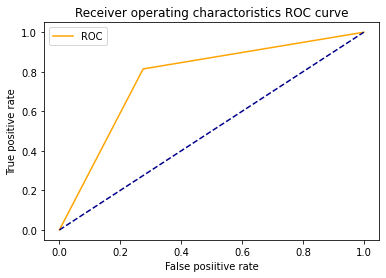

In [48]:
#Plotting ROC curve

plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [46]:
#ROC curve is good now we needs to find the Area under the curve

In [49]:
#Finding AUC score
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.7696683422999298


In [47]:
#AUC score is 76%.

# Now we are going to predict the labels

In [50]:
conclusion=pd.DataFrame([clf.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,91706,91707,91708,91709,91710,91711,91712,91713,91714,91715
Predicted,1,1,1,1,0,1,1,1,1,0,...,1,0,0,1,1,1,1,0,1,0
Original,1,1,0,0,0,0,1,1,0,0,...,1,1,0,1,0,1,1,0,1,1


In [48]:
#We have successfully predicted the the labels using decision tree.

# Logistic Regression

In [39]:
#Model Training

log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [40]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [41]:
#Finding the accuracy score

accuracy=accuracy_score(y_test, y_pred)
accuracy

0.7707597365781325

In [ ]:
#We got accuracy score: 77%.

In [42]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[36663,  9261],
       [11764, 34028]], dtype=int64)

In [43]:
metric_score(log_reg, x_train, x_test, y_train, y_test, train=True)

metric_score(log_reg, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:77.06%

 =============Test Result================
Accuracy score:77.08%

 
 classification report 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78     45924
           1       0.79      0.74      0.76     45792

    accuracy                           0.77     91716
   macro avg       0.77      0.77      0.77     91716
weighted avg       0.77      0.77      0.77     91716



In [49]:
#We got the training score & testing score: 77%,
#Also got precision, recall, & f 1 score: 77%.

In [44]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [45]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.20165926 1.        ]
True Positive Rate [0.         0.74309923 1.        ]
Threshold [2 1 0]


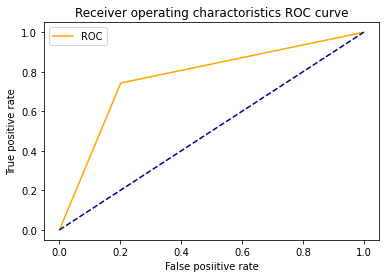

In [46]:
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()


In [47]:
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.7707199840881946


#Got AUC score: 77%. Now we are going to predict the labels 

In [48]:
conclusion=pd.DataFrame([log_reg.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,91706,91707,91708,91709,91710,91711,91712,91713,91714,91715
Predicted,1,1,1,1,0,1,1,1,0,0,...,0,0,1,1,0,0,1,0,1,0
Original,1,1,0,0,0,0,1,1,0,0,...,1,1,0,1,0,1,1,0,1,1


# Random Forest Classifier

In [37]:
random_clf= RandomForestClassifier()

random_clf.fit(x_train, y_train)


RandomForestClassifier()

In [38]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)



 =============Train Result===============
Accuracy score:100.00%

 =============Test Result================
Accuracy score:97.99%

 
 classification report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     45924
           1       1.00      0.96      0.98     45792

    accuracy                           0.98     91716
   macro avg       0.98      0.98      0.98     91716
weighted avg       0.98      0.98      0.98     91716



In [43]:
#Random forest testing score: 100% which means model is overfitted, Testing score: 98% which is very good score.
#Similarly precision, recall & f1 score: 98%.

# Parameter Tunning

In [ ]:
param={"n_estimators":[13,15],
       "criterion":["entropy","gini"],
       "max_depth":[10,15],
       "min_samples_split":[10,11],
       "min_samples_leaf":[5,6]
       
      }

grd=GridSearchCV(random_clf, param_grid= param)

grd.fit(x_train,y_train)

print("best_params=>", grd.best_params_)

In [39]:
random_clf=RandomForestClassifier(criterion= 'gini', max_depth=15, min_samples_leaf=5, min_samples_split=11, n_estimators= 15)


random_clf.fit(x_train, y_train)


RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=15)

In [40]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:92.14%

 =============Test Result================
Accuracy score:90.70%

 
 classification report 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     45924
           1       0.93      0.88      0.90     45792

    accuracy                           0.91     91716
   macro avg       0.91      0.91      0.91     91716
weighted avg       0.91      0.91      0.91     91716



In [41]:
#After Parameter tunning we got tarining accuracy score: 92%, testing score: 91%, Precision, recall & f1 score: 91%. 

In [42]:
#Lets plot confusion matrix
y_pred=random_clf.predict(x_test)

In [43]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[42721,  3203],
       [ 5327, 40465]], dtype=int64)

In [44]:
#Finding  False positive rate, True positive rate, threshold, AUC, ROC curve.

fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [48]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.06854804 1.        ]
True Positive Rate [0.         0.88858316 1.        ]
Threshold [2 1 0]


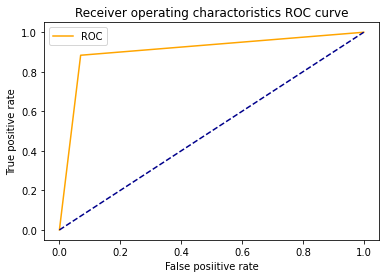

In [45]:
# Plotting ROC curve

plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [46]:
#Finding AUC score
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.9069619849319914


In [51]:
conclusion=pd.DataFrame([random_clf.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,91706,91707,91708,91709,91710,91711,91712,91713,91714,91715
Predicted,1,1,0,0,0,0,1,1,0,0,...,1,1,0,1,0,1,1,0,0,0
Original,1,1,0,0,0,0,1,1,0,0,...,1,1,0,1,0,1,1,0,1,1


In [ ]:
#Looking at the all models it is observed that Random forest is the best model for prediction because of parametrer tunning score is very good : 91% & AUC score is also very good: 91% Hence it is better to finalise the Random forest for Model prediction.

# Final model loading & prediction Actual Vs Predicted

In [47]:
#Saving the model in local file system 
import pickle

pickle.dump(random_clf, open("rf6", "wb"))

In [48]:
loaded_model=pickle.load(open("rf6", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

90.6995507872127


In [49]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,91706,91707,91708,91709,91710,91711,91712,91713,91714,91715
Predicted,1,1,0,0,0,0,1,1,0,0,...,1,1,0,1,0,1,1,0,0,0
Original,1,1,0,0,0,0,1,1,0,0,...,1,1,0,1,0,1,1,0,1,1
